**1.3.1 Задание**

[1 2 3] и [0 0 0]
3.7416573867739413
14.0
3.0
6.0

[2 2 5] и [0 0 0]
5.744562646538029
33.0
5.0
9.0

[2 2 5] и [1 2 3]
2.23606797749979
5.000000000000001
2.0
3.0

[2 3 0] и [0 0 0]
3.605551275463989
12.999999999999998
3.0
5.0

[2 3 0] и [1 2 3]
3.3166247903554
11.0
3.0
5.0

[2 3 0] и [2 2 5]
5.0990195135927845
25.999999999999996
5.0
6.0



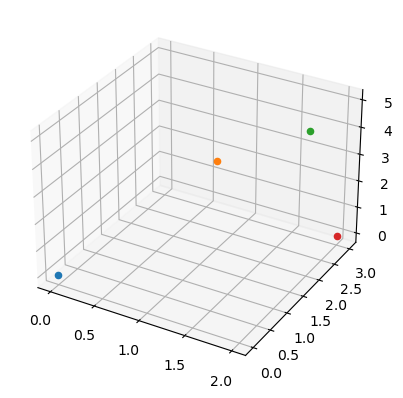

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = np.array([0,0,0])
x2 = np.array([1,2,3])
x3 = np.array([2,2,5])
x4 = np.array([2,3,0])

ax.scatter(0,0,0)
ax.scatter(1,2,3)
ax.scatter(2,2,5)
ax.scatter(2,3,0)

for x in [x1, x2, x3,x4]:
    for y in [x1, x2, x3, x4]:
        if all(x == y):
            break
        print(f"{x} и {y}")
        
        print(np.linalg.norm(x - y))
        print(np.linalg.norm(x - y) ** 2)
        print(np.linalg.norm(x - y, ord=np.inf))
        print(np.linalg.norm(x - y, ord=1))
        print()

plt.show()

**2.3.1 Задание**

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


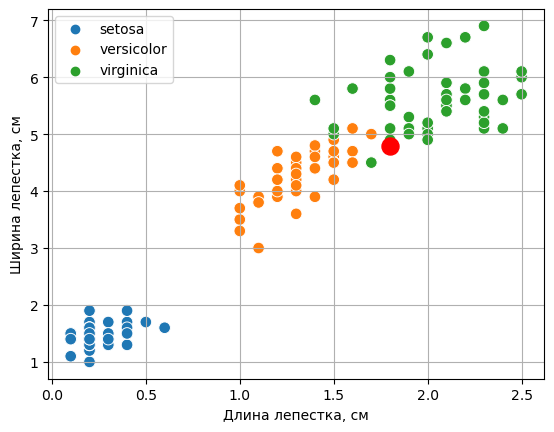

0.9565217391304348
accuracy: 0.957


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


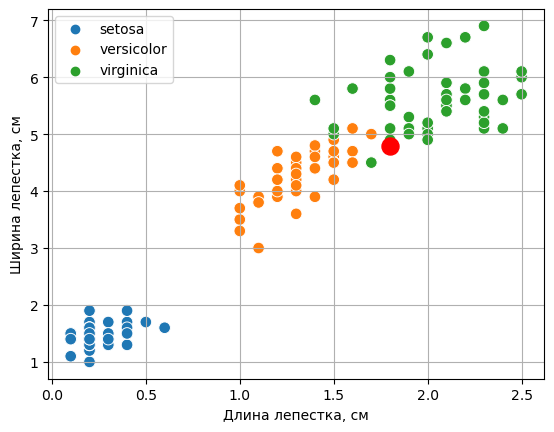

0.9565217391304348
accuracy: 0.957


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


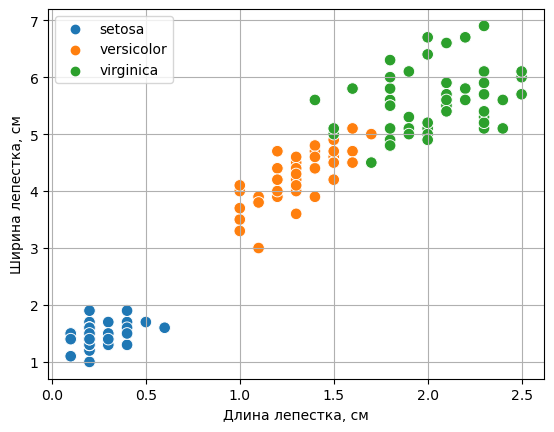

1.0
accuracy: 1.0


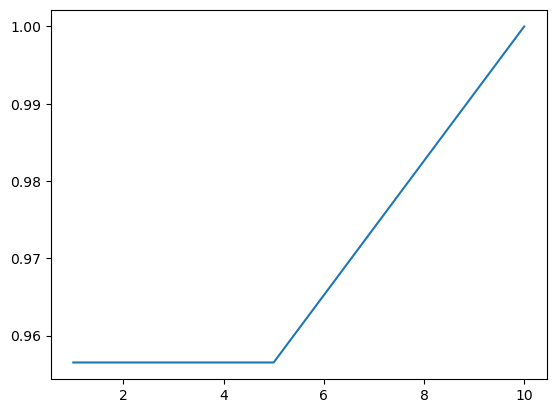

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
score = []
iris = sns.load_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas таблица, для нее нужно указывать iloc
    iris.iloc[:, :-1], # берем все колонки кроме последней в признаки
    iris.iloc[:, -1],  # последнюю в целевую переменную (класс)
    test_size = 0.15 # размер тестовой выборки 20%
)

def prediction(K):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # plt.figure(figsize=(10,7))
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend(loc=2)
    plt.grid()

    # Перебираем все объекты из теста
    for i in range(len(y_test)):
        #Если предсказание неправильное 
        if np.array(y_test)[i] != y_pred[i]:
            # то подсвечиваем точку красным
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color = 'red', s = 150)
    plt.show()
    score.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')


prediction(1)
prediction(5)
prediction(10)

plt.plot([1, 5, 10], score)
plt.show()

**3.3.2 Задание**

In [4]:
from sklearn.feature_extraction import DictVectorizer

data = [{"цвет глаз":1, "пол":1},
        {"цвет глаз":4, "пол":2},
        {"цвет глаз":3, "пол":1} ]
dictvectorizer = DictVectorizer(sparse=False)

features = dictvectorizer.fit_transform(data)
print(features)

[[1. 1.]
 [2. 4.]
 [1. 3.]]
